<a href="https://www.kaggle.com/code/eavprog/abscur-reyting-dohod?scriptVersionId=163978546" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Настоящий файл устарел!!!

Новая версия находится по адресу https://www.kaggle.com/code/eavprog/abscur2

---



# Рейтинг абсолютной доходности для проекта "Абсолютные валютные курсы"

ДОБРО ПОЖАЛОВАТЬ НА СТРАНИЦУ РЕЙТИНГОВ ДОХОДНОСТИ ПО АБСОЛЮТНЫМ ВАЛЮТНЫМ КУРСАМ

На этой странице вы найдете подробные рейтинги доходности для 45 валют, рассчитанные на основе абсолютных валютных курсов. Мы представляем данные за различные временные промежутки: месяц, квартал, полгода, год, 2 года, 3 года и 5 лет. Перемещаться по этим разделам будет удобно при помощи меню справа на странице.

Доходность здесь расчитывается как отношение изменения абсолютного валютного курса за период к начальному значению абсолютного курса.

$$
Doh = \frac{A_{end}-A_{start}}{A_{start}}
$$

Для каждого периода мы предоставляем столбчатые диаграммы, которые отображают доходности валют, упорядоченные по убыванию. На горизонтальной оси диаграмм вы найдете коды валют, а на вертикальной оси - процентную доходность. 

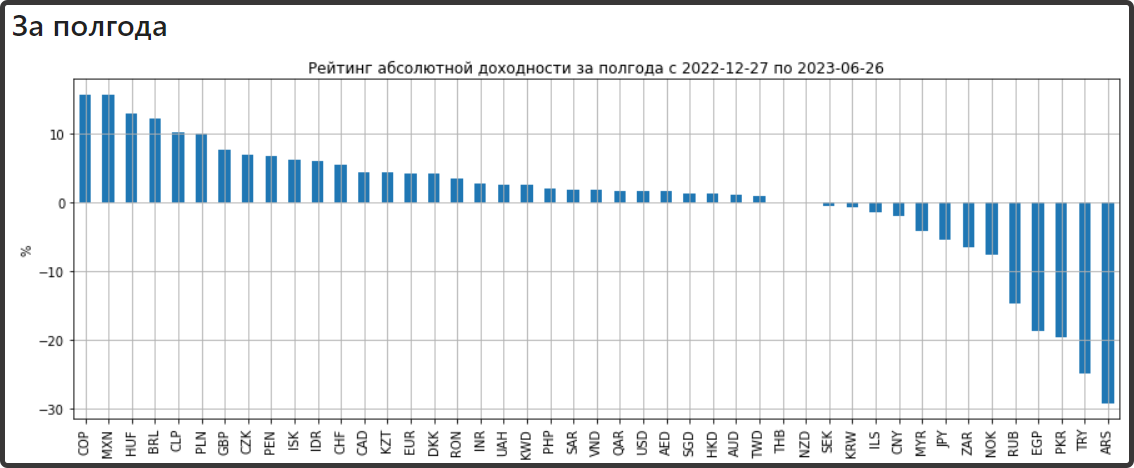

Помимо диаграмм, под каждым графиком мы предлагаем таблицу с самыми доходными и самыми убыточными валютами по абсолютному курсу. В таблице указаны коды валют, их расшифровки, процент доходности, а также ссылка на страницу Википедии с описанием каждой валюты и ссылка на страницу с графиком истории абсолютного курса.

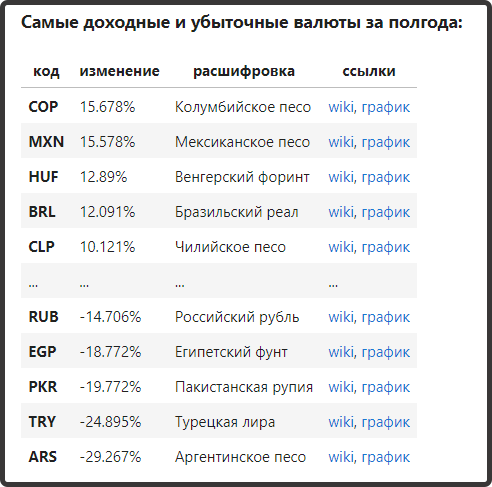

Чтобы получить более подробную информацию о рейтингах и графиках за определенный временной промежуток, вы можете перейти по ссылкам, указанным под таблицей. Там вы найдете информацию о проекте, которая соответствует выбранному периоду.

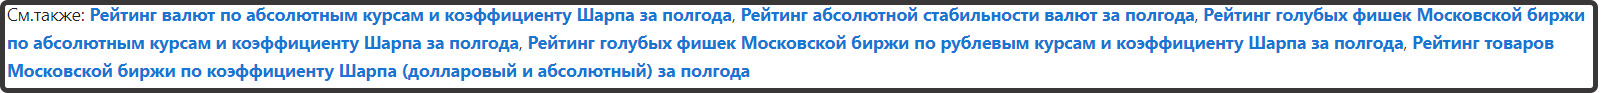

Мы надеемся, что предоставленные рейтинги и графики помогут вам лучше оценить доходность валют на основе абсолютных валютных курсов и сделать информированные инвестиционные решения.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from IPython.display import Markdown, display

import abscur_post as ap
import abscur_menu
abscur_menu.print_menu()

data_abs = pd.read_csv('/kaggle/input/abscur-data/abscur.csv',index_col=0,parse_dates=True)
# data_abs.last("15d")

cur_ras = pd.read_csv('/kaggle/input/abscur-data/cur_ras.csv',index_col=0)

img_cnt = 0
tabs = []
period = []
comments = []

diap = [[30,"месяц"],[92,"квартал"],[182,"полгода"],[365,"год"],[2*365,"2 года"],[3*365,"3 года"],[5*365,"5 лет"]]

for per,title_per in diap:
    text = "# За "+title_per
    display(Markdown(text))
    
    date_start = data_abs.asfreq(freq="D").index[-per]
    date_finish = data_abs.index[-1]
    
    res = data_abs[data_abs.index >= date_start]
    res = (res.iloc[-1]-res.iloc[0])/res.iloc[0]*100
    res.sort_values(ascending=False,inplace=True)
    res.plot.bar(grid=True,title="Рейтинг абсолютной доходности за "+title_per+" c "+datetime.datetime.strftime(date_start,"%Y-%m-%d")+" по " + datetime.datetime.strftime(date_finish,"%Y-%m-%d"),ylabel="%",legend=False,figsize=(15,5))
    plt.savefig(str(img_cnt) + ".png")
    img_cnt += 1
    plt.show()
    
    comment = f"За {title_per} показали наибольшую доходность по абсолютному курсу такие валюты как "
    
    text = "**Самые доходные и убыточные валюты за " + title_per + ":**\n\n"
    text += "|код|изменение|расшифровка|ссылки|\n"
    text += "|-|-|-|-|\n"
    for n in range(5):
        cur = res.index[n]
        text += "|**" + cur + "**|" + str(np.round(res.loc[cur],3)) + "%|" + cur_ras.loc[cur][0] + "|[wiki](" + cur_ras.loc[cur][1] + "), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#" + cur + ")|\n"
        comment += f", {cur} ({str(np.round(res.loc[cur],3))}%)"
    text += "|...|...|...|...|\n"
    comment += f" и показали наименьшую доходность по абсолютному курсу такие валюты как "
    for n in range(len(res.index)-5,len(res.index)):
        cur = res.index[n]
        text += "|**" + cur + "**|" + str(np.round(res.loc[cur],3)) + "%|" + cur_ras.loc[cur][0] + "|[wiki](" + cur_ras.loc[cur][1] + "), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#" + cur + ")|\n"
        comment += f", {cur} ({str(np.round(res.loc[cur],3))}%)"
    display(Markdown(text))
    comment += "."
    comment = comment.replace("как ,","как")
    
    text = "См.также: "
    text += "[**Рейтинг валют по абсолютным курсам и коэффициенту Шарпа за " + title_per + "**](https://www.kaggle.com/code/eavprog/abscur-sharp/notebook#За-" + title_per.replace(" ","-") + ")"
    text += ", "
    text += "[**Рейтинг абсолютной стабильности валют за " + title_per + "**](https://www.kaggle.com/code/eavprog/abscur-reit-stabil/notebook#За-" + title_per.replace(" ","-") + ")"
    text += ", "
    text += "[**Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа за " + title_per + "**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp/notebook#За-" + title_per.replace(" ","-") + ")"
    text += ", "
    text += "[**Рейтинг голубых фишек Московской биржи по рублевым курсам и коэффициенту Шарпа за " + title_per + "**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp-rub/notebook#За-" + title_per.replace(" ","-") + ")"
    text += ", "
    text += "[**Рейтинг товаров Московской биржи по коэффициенту Шарпа (долларовый и абсолютный) за " + title_per + "**](https://www.kaggle.com/code/eavprog/abscur-tovar-sharp/notebook#За-" + title_per.replace(" ","-") + ")"
    display(Markdown(text))
    
    comments.append(comment)
    period.append(title_per)
       
#     break


num = np.random.randint(img_cnt)
text = comments[num]
text += "\n---\nРейтинги доходности за все периоды в тетрадке на Kaggle по адресу - https://www.kaggle.com/code/eavprog/abscur-reyting-dohod"
img_file = str(num) + ".png"
# ap.send_img_and_text(img_file,text)